Content-Based Recommendation Model

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [21]:
df = pd.read_excel("/content/bersih1.xlsx")

In [22]:
df.isnull().sum()

#                   0
code               66
name                0
pelaksanaan         0
jenis_diklat       90
sifat_diklat       90
pohon_profesi      90
dahan_profesi      90
profesi            90
profisiensi        90
total_handout       0
total_tayang        0
total_video         0
total_audio         0
total_corputube     0
dtype: int64

In [23]:
df_clear = df.dropna(axis=0)

In [24]:
df_clear.isnull().sum()

#                  0
code               0
name               0
pelaksanaan        0
jenis_diklat       0
sifat_diklat       0
pohon_profesi      0
dahan_profesi      0
profesi            0
profisiensi        0
total_handout      0
total_tayang       0
total_video        0
total_audio        0
total_corputube    0
dtype: int64

In [25]:
new_df = df_clear['code'].value_counts()

In [27]:
Profesi = df_clear['profesi'].value_counts()

In [28]:
profisiensi = df_clear['profisiensi'].value_counts()

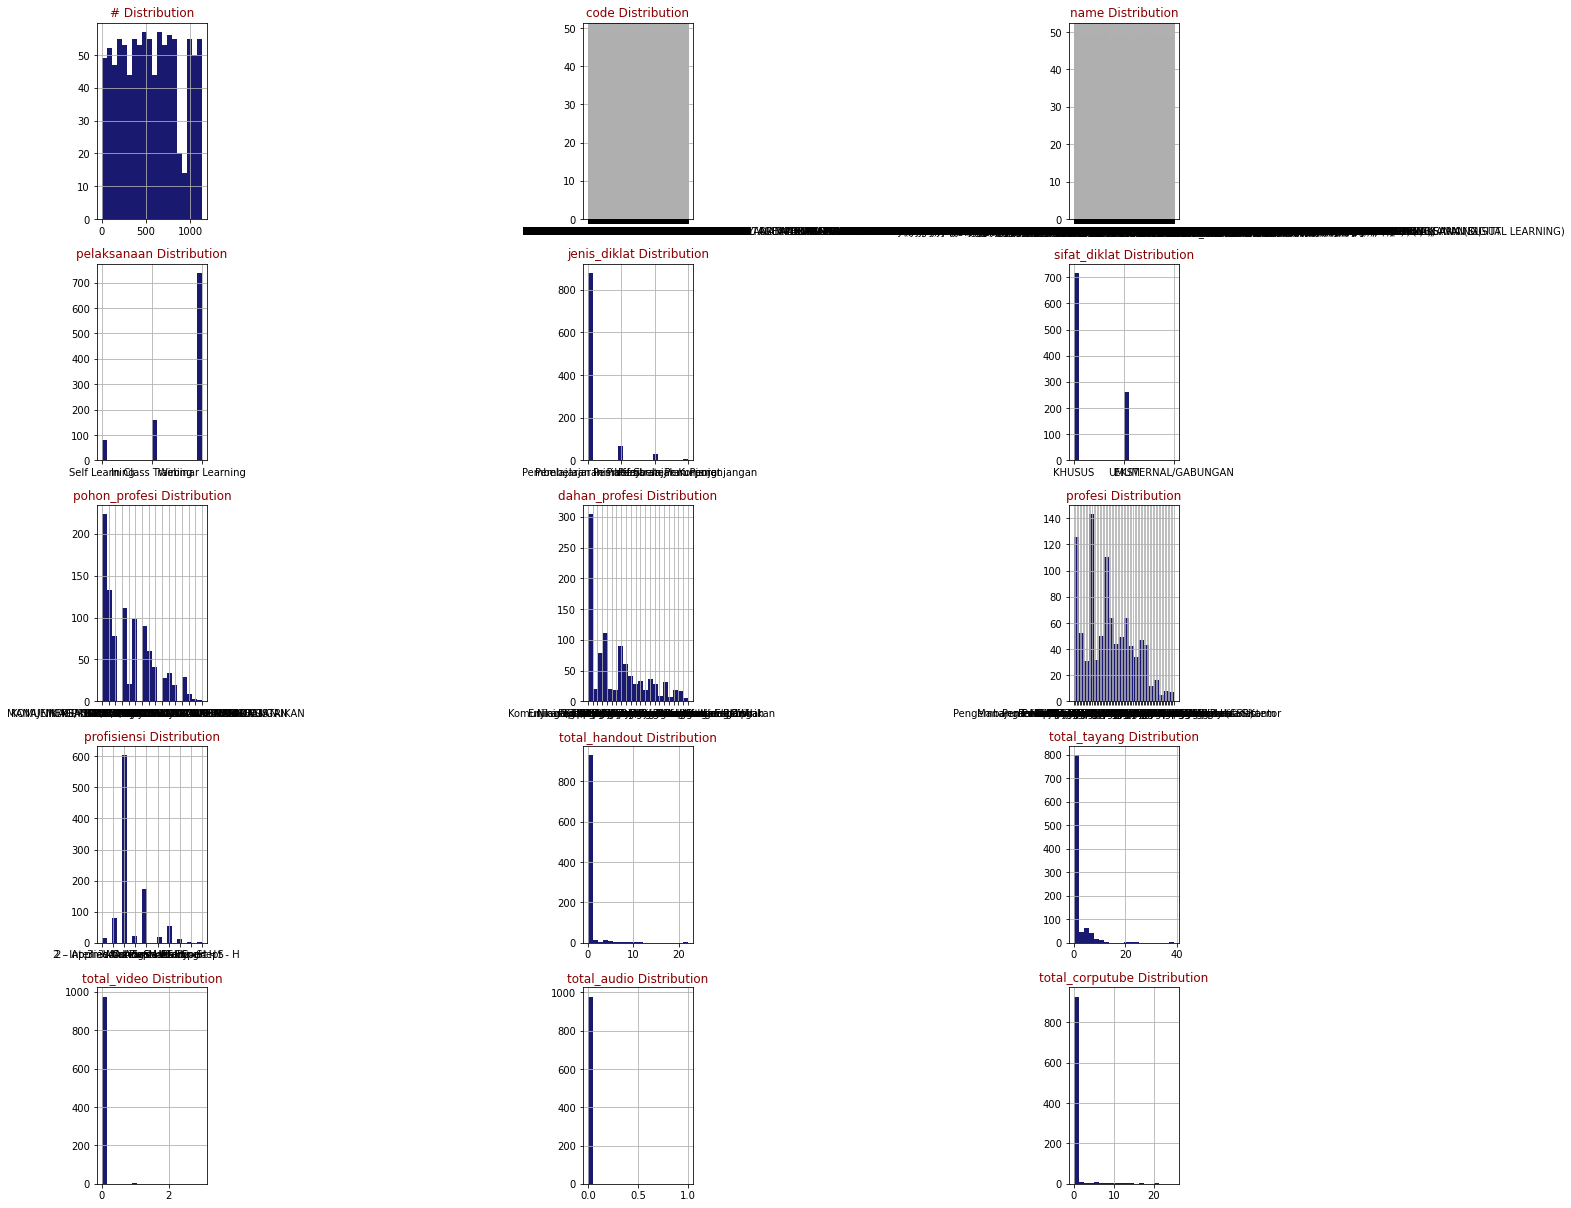

In [29]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df_clear,df_clear.columns,6,3)

In [30]:
# Dataset yang akan dipakai untuk train test split
new_df = df_clear[['code','name','pohon_profesi','dahan_profesi','profesi']]

In [31]:
# For Text
import re

new_df['profesi'] = [re.sub(r'[^\w\s]', '', t) for t in new_df['profesi']]
new_df['pohon_profesi'] = [re.sub(r'[^\w\s]', '', t) for t in new_df['pohon_profesi']]

new_df['profesi'] = [t.lower() for t in new_df['profesi']]
new_df['pohon_profesi'] = [t.lower() for t in new_df['pohon_profesi']]

<ipython-input-31-7cb03815ad28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['profesi'] = [re.sub(r'[^\w\s]', '', t) for t in new_df['profesi']]
<ipython-input-31-7cb03815ad28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['pohon_profesi'] = [re.sub(r'[^\w\s]', '', t) for t in new_df['pohon_profesi']]
<ipython-input-31-7cb03815ad28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [32]:
new_df["combined"] = new_df['profesi'] + '  ' + new_df['pohon_profesi'] + '  ' + new_df['name'] 
new_df.drop(["code","dahan_profesi"],axis=1,inplace=True)

<ipython-input-32-70267534f81b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["combined"] = new_df['profesi'] + '  ' + new_df['pohon_profesi'] + '  ' + new_df['name']
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

new_df.set_index('name', inplace=True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(new_df['combined'])
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [34]:
# Set index utama di kolom 'name'
indices = pd.Series(new_df.index)
indices[:10]

0                      DASAR INSTRUMENTASI DAN KONTROL
1                           PENGENALAN PDKB SUTT/SUTET
2    PENGENALAN TRANSAKSI TENAGA LISTRIK / NIAGA PE...
3                      DASAR KELISTRIKAN PROTEKSI (DL)
4              AKUNTANSI BIAYA UMUM (DIGITAL LEARNING)
5          ANALISA LAPORAN KEUANGAN (DIGITAL LEARNING)
6                   PERHITUNGAN TTL (DIGITAL LEARNING)
7                                           PROTOKOLER
8                                   PENGANTAR OBLIGASI
9                      EAM DISTRIBUSI - AWARENESS (DL)
Name: name, dtype: object

In [35]:
def recommendations(name, cos_sim = cos_sim):
    
    recommended = []
    
    # Mengambil nama pembelajaran berdasarkan variabel indicies
    idx = indices[indices == name].index[0]

    # Membuat series berdasarkan skor kesamaan
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending = False)

    # mengambil index dan dibuat 10 baris rekomendasi terbaik
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    for i in top_10_indexes:
        recommended.append(list(new_df.index)[i])
        
    return recommended

In [36]:
recommendations('PELAYANAN PELANGGAN (DIGITAL LEARNING)')

['PELAYANAN PELANGGAN LANJUTAN',
 'PELAYANAN PRIMA (DIGITAL LEARNING)',
 'REVENUE ASSURANCE - PEMBENAHAN DATA PELANGGAN (DIGITAL LEARNING)',
 'PELAYANAN PRIMA UNTUK YANTEK, NIAGA & P2TL',
 'MANAJEMEN DATA INDUK PELANGGAN (DIGITAL LEARNING)',
 'MANAJEMEN TARIF (DIGITAL LEARNING)',
 'IMPLEMENTASI OUTAGE MANAGEMENT',
 'PRACTICAL HYPNOSELLING (DIGITAL LEARNING)',
 'HEARTY SERVICE (DIGITAL LEARNING)',
 'PENGEMBANGAN PELAYANAN PELANGGAN']

In [37]:
recommendations('PROTEKSI TEGANGAN LEBIH (PETIR DAN SURJA HUBUNG) PADA TRANSMISI TENAGA LISTRIK (DL)')

['STABILITAS SISTEM TENAGA LISTRIK (DL)',
 'PROTEKSI JARINGAN TRANSMISI DAN GARDU INDUK (DL)',
 'PERENCANAAN PEMELIHARAAN PENYALURAN TENAGA LISTRIK (DL)',
 'PEMELIHARAAN PROTEKSI TRANSMISI',
 'ANALISA DAN EVALUASI KINERJA TERHADAP TEGANGAN LEBIH IMPULS',
 'SUPERVISI PEMELIHARAAN PROTEKSI SISTEM',
 'ENJINIRING PROTEKSI SISTEM',
 'EVALUASI PROYEKSI KEBUTUHAN TENAGA LISTRIK (DL)',
 'PEMELIHARAAN PROTEKSI GARDU INDUK',
 'SUPERVISI PEMELIHARAAN TRANSFORMATOR TENAGA']

In [38]:
recommendations('MANAJEMEN PRODUKSI')

['METALURGI PEMBANGKIT (DL)',
 'ANALISA GANGGUAN PROTEKSI GARDU INDUK DAN PENGHANTAR',
 'PEMELIHARAAN PERALATAN SWITCHGEAR',
 'KOMISIONING PERALATAN PROTEKSI',
 'SUPERVISI PEMELIHARAAN PERALATAN GIS',
 'PENGOPERASIAN PERALATAN KELISTRIKAN PEMBANGKIT',
 'ASESMEN PERALATAN PRIMER GARDU INDUK',
 'MANAJEMEN MATERIAL KONSTRUKSI KETENAGALISTRIKAN',
 'PENGENALAN PERALATAN GARDU INDUK (DL)',
 'SUPERVISI ENJINIRING DESIGN PERALATAN BANTU PEMBANGKIT']